In [1]:
import numpy as np
import matplotlib.pyplot as plt

from Gaussian import Gaussian
from LinGaussTest import LinGaussTest
from modmcmc import State, BlockMCMCSampler, LogDensityTerm, TargetDensity
from modmcmc.kernels import MarkovKernel, GaussMetropolisKernel, DiscretePCNKernel, mvn_logpdf

from helper import get_col_hist_grid, plot_trace, get_cpm_sampler, get_approx_mwg_sampler, run_sampler
from helper import get_naive_cut_sampler, get_cut_pcn_sampler, get_ep_rv, get_eup_rv, direct_sample_ep

In [2]:
rng = np.random.default_rng(532124)
d = 3
n = 20

In [3]:
test = LinGaussTest(rng=rng, d=d, n=n)

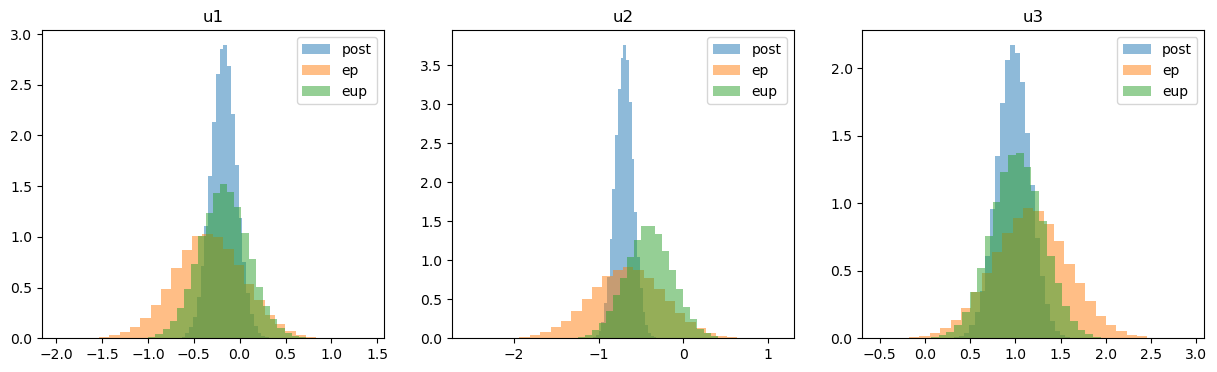

In [4]:
plt = test.get_hist_plot(100000)

# Compare exact EP vs MCMC-based approximations

In [ ]:
# Correlated pseudo marginal
cpm = get_cpm_sampler(y, u, G, noise, e, rng, pcn_cor=0.99)
samp_cpm, cpm, trace_cpm = run_sampler(cpm)
plt.show()

In [ ]:
# Naive cut
cut_alg = get_naive_cut_sampler(y, u, G, noise, e, rng, u_prop_scale=0.1)
samp_cut, cut_alg, trace_cut = run_sampler(cut_alg)
plt.show()

In [ ]:
# Approximate Metropolis-within-Gibbs (with naive normalizing constant estimation)
mwg = get_approx_mwg_sampler(y, u, G, noise, e, rng, pcn_cor=0.99)
samp_mwg, mwg, trace_mwg = run_sampler(mwg)
plt.show()

In [ ]:
# Cut pCN algorithm.
cut_pcn = get_cut_pcn_sampler(y, u, G, noise, e, rng, pcn_cor=0.99)
samp_cut_pcn, cut_pcn, trace_cut_pcn = run_sampler(cut_pcn)
plt.show()

## Comparison

In [ ]:
hist_plt_mcmc = get_col_hist_grid(samp_eup, samp_ep, samp_cpm, samp_cut, samp_mwg, samp_cut_pcn, bins=30, nrows=1, 
                                  col_labs=col_labs, plot_labs=["EUP", "EP", "cpm", "cut", "mwg", "cut-pcn"])
plt.show()

In [ ]:
hist_plt_mwg = get_col_hist_grid(samp_eup, samp_ep, samp_mwg, bins=30, nrows=1, 
                                 col_labs=col_labs, plot_labs=["EUP", "EP", "mwg"])
plt.show()

In [ ]:
hist_plt_cut_pcn = get_col_hist_grid(samp_eup, samp_ep, samp_cut_pcn, bins=30, nrows=1, 
                                     col_labs=col_labs, plot_labs=["EUP", "EP", "cut-pcn"])
plt.show()